## MD005 Primer entregable: Agrupamiento (clustering)

### Procesado Inicial

Como no podria ser de otra forma, lo primero que hago para poder trabajar los datos es incluir todas las librerias que necesitare para la realización del proyecto.

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

import statsmodels.api as sm

from sklearn import preprocessing, cluster
import scipy

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import plotly.express as px
import warnings

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, DBSCAN

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import OPTICS

Una vez incluidas las librerias me dispongo a obtener los datos del fichero escogido. En mi caso, he elegido el dataset propuesto de league of legends encontrado en el siguiente link: https://www.kaggle.com/datasets/chiniczr/league-of-legends-summoners-and-match-data?resource=download&select=data_all.csv

Aqui, tenia se dispone de una cantidad enorme de datos, por un lado explicaba el formato de los datos en la API del videojuego, y como extraerlos y tratarlos. En este caso, lo que debia hacerse es obtener una API key para la API de league of legens, extraer todos los datos, guardarlos en clases, ficheros o como se prefiriese, y despues observarlos y analizarlos para extraer estadísticas que luego puedan ser analizadas.

 Por otro lado, y es la via por la que finalmente he optado, en el mismo link disponemos de un fichero llamado data_all.csv en el cual nos encotramos con 43 columnas de datos que se han extraido de la API de league of legends y han sido tratadas para su uso. En las siguientes celdas realizaré un analisi exploratorio de estos datos y comentaré sobre ellos.

In [2]:
warnings.filterwarnings('ignore')

dtf = pd.read_csv(r'C:\Users\josep\Downloads\data_all\data_all.csv', sep = ',', encoding = 'latin1', error_bad_lines=False) #error_bad_lines is avoid single line error
dtf.describe()


,total_blue_barons,total_blue_drakes,total_blue_heralds,total_blue_inhibs,total_blue_kills,total_blue_turrets,blue_first_blood,blue_first_herald,blue_first_drake,blue_first_baron,...,total_red_vs,total_red_gold,med_red_kills,med_red_xp,med_red_gold,med_red_dmg,red_got_soul,total_red_elders,med_red_vs,winning_team
count,260367.000000,260367.000000,260367.000000,260367.000000,260367.000000,260367.000000,260367.000000,260367.000000,260367.000000,260367.000000,...,260358.000000,260367.000000,260367.000000,260367.000000,260367.000000,260367.000000,260367.000000,260367.000000,260367.000000,260367.000000
mean,0.339440,0.489339,0.515490,0.407169,0.503701,0.502028,0.509984,0.516444,0.481186,0.339736,...,0.496992,0.499362,0.490888,0.500304,0.499193,0.497768,0.119973,0.022362,0.497868,0.495374
std,0.448134,0.355120,0.433701,0.465300,0.156486,0.319984,0.499901,0.499730,0.499647,0.473620,...,0.067807,0.053889,0.187602,0.048137,0.056529,0.085262,0.324931,0.145932,0.078165,0.499980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.308279,0.000000,0.000000,0.260425,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.200000,0.000000,0.000000,0.382353,0.222222,0.000000,0.000000,0.000000,0.000000,...,0.453039,0.455412,0.357143,0.458473,0.454533,0.436743,0.000000,0.000000,0.448980,0.000000
50%,0.000000,0.500000,0.500000,0.000000,0.504348,0.500000,1.000000,1.000000,0.000000,0.000000,...,0.497006,0.498792,0.500000,0.499752,0.499013,0.497676,0.000000,0.000000,0.500000,0.000000
75%,1.000000,0.750000,1.000000,1.000000,0.625000,0.777778,1.000000,1.000000,1.000000,1.000000,...,0.540897,0.543405,0.625000,0.542428,0.543911,0.558541,0.000000,0.000000,0.547170,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.712882,1.000000,0.954211,0.724554,0.955552,1.000000,1.000000,1.000000,1.000000


Con esta descripcion de nuestro dataset podemos apreciar como se conforma de 260367 filas de datos y que esteos ya vienen totalmente normalizados y todos los valores se encuentran entre el 0 y el 1. 

Ahora me dispongo a realizar algunas tareas para el limpiado de los datos. Primero me voy a deshacer de los valores nulos.

In [5]:
dtf = dtf.dropna()
dtf.describe()

,total_blue_barons,total_blue_drakes,total_blue_heralds,total_blue_inhibs,total_blue_kills,total_blue_turrets,blue_first_blood,blue_first_herald,blue_first_drake,blue_first_baron,...,total_red_vs,total_red_gold,med_red_kills,med_red_xp,med_red_gold,med_red_dmg,red_got_soul,total_red_elders,med_red_vs,winning_team
count,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,...,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000
mean,0.339452,0.489356,0.515507,0.407183,0.503716,0.502046,0.510002,0.516462,0.481203,0.339748,...,0.496992,0.499362,0.490905,0.500320,0.499193,0.497783,0.119977,0.022363,0.497885,0.495372
std,0.448137,0.355115,0.433698,0.465302,0.156463,0.319976,0.499901,0.499730,0.499648,0.473624,...,0.067807,0.053890,0.187583,0.048057,0.056530,0.085218,0.324935,0.145934,0.078111,0.499980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.308279,0.000000,0.000000,0.260425,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.200000,0.000000,0.000000,0.382353,0.222222,0.000000,0.000000,0.000000,0.000000,...,0.453039,0.455410,0.357143,0.458474,0.454530,0.436754,0.000000,0.000000,0.448980,0.000000
50%,0.000000,0.500000,0.500000,0.000000,0.504348,0.500000,1.000000,1.000000,0.000000,0.000000,...,0.497006,0.498787,0.500000,0.499755,0.499011,0.497676,0.000000,0.000000,0.500000,0.000000
75%,1.000000,0.750000,1.000000,1.000000,0.625000,0.777778,1.000000,1.000000,1.000000,1.000000,...,0.540897,0.543406,0.625000,0.542429,0.543914,0.558542,0.000000,0.000000,0.547170,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.712882,1.000000,0.954211,0.724554,0.955552,1.000000,1.000000,1.000000,1.000000


Aplicando un poco de conocimiento de dominio, sabemos que las estadisticas red y blue deberian ser muy parecidas, ademas que en la descripcion de los datos podemos ver como sus atributos son muy similares, asi que lo siguiente que haré sera filtrarlos en 2 datasets distintos de los cuales mas tarde usaré uno para trabajar con el, y lo primero que haré sera una matriz de correlaciones para observar posibles relaciones entre las variables.

In [6]:
dtf_red = dtf.filter(regex='(red|winning_team)')
dtf_blue = dtf.filter(regex='(blue|winning_team)')
dtf_red.describe()
dtf_blue.describe()

,total_blue_barons,total_blue_drakes,total_blue_heralds,total_blue_inhibs,total_blue_kills,total_blue_turrets,blue_first_blood,blue_first_herald,blue_first_drake,blue_first_baron,...,total_blue_vs,total_blue_gold,med_blue_kills,med_blue_xp,med_blue_gold,med_blue_dmg,blue_got_soul,total_blue_elders,med_blue_vs,winning_team
count,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,...,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000,260358.000000
mean,0.339452,0.489356,0.515507,0.407183,0.503716,0.502046,0.510002,0.516462,0.481203,0.339748,...,0.503008,0.500638,0.500271,0.499677,0.500807,0.502157,0.105893,0.020552,0.501259,0.495372
std,0.448137,0.355115,0.433698,0.465302,0.156463,0.319976,0.499901,0.499730,0.499648,0.473624,...,0.067807,0.053890,0.187454,0.048057,0.056530,0.085220,0.307701,0.139572,0.078085,0.499980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.287118,0.000000,0.000000,0.275446,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.200000,0.000000,0.000000,0.382353,0.222222,0.000000,0.000000,0.000000,0.000000,...,0.459103,0.456594,0.368421,0.457570,0.456086,0.441418,0.000000,0.000000,0.452703,0.000000
50%,0.000000,0.500000,0.500000,0.000000,0.504348,0.500000,1.000000,1.000000,0.000000,0.000000,...,0.502994,0.501213,0.500000,0.500244,0.500989,0.502282,0.000000,0.000000,0.500000,0.000000
75%,1.000000,0.750000,1.000000,1.000000,0.625000,0.777778,1.000000,1.000000,1.000000,1.000000,...,0.546961,0.544590,0.636364,0.541524,0.545470,0.563212,0.000000,0.000000,0.550562,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.691721,1.000000,0.833871,0.739575,0.877018,1.000000,1.000000,1.000000,1.000000


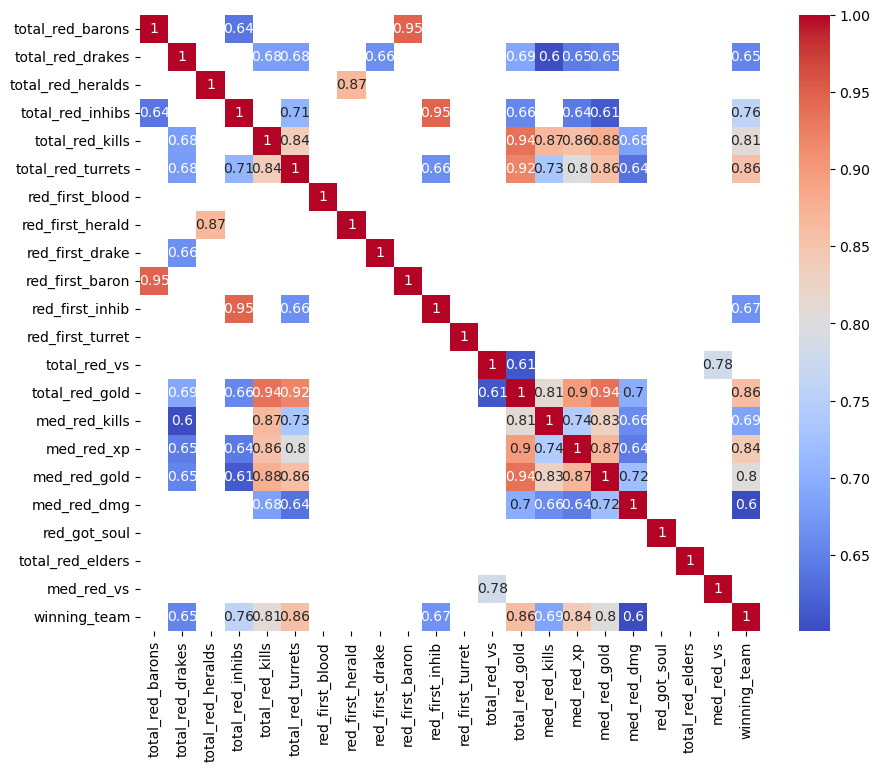

In [16]:
correlation_matrix = dtf_red.corr()

correlation_matrix[np.abs(correlation_matrix) < 0.6] = np.nan

plt.figure(figsize=(10, 8))  # You can adjust the dimensions as needed

# Use Seaborn to create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


Como se puede apreciar he usado el dataset con los valores del equipo rojo, y he filtrado solo por correlaciones superiores a 0.6 para no tener una sobrecarga de informacion.

De todas las variables que tengo, la que mas curiosidad me genera como buen lolero que soy, es la del winning_team, es decir, cuando ganamos, para ver que factores influencian más esta estadistica. A continuación voy a generar un gráfico de barras con las distintas correlaciones de las variables hacia esta.

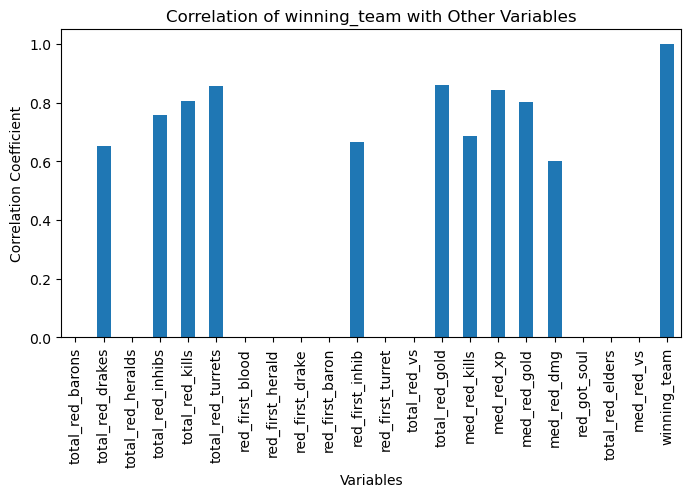

In [17]:
variable1_correlations = correlation_matrix.loc['winning_team']

plt.figure(figsize=(8, 4))
variable1_correlations.plot(kind='bar')
plt.title('Correlation of winning_team with Other Variables')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

Vemos como las variables que mas influyen en la victoria son el oro generado, y las torres destruidas. Este analisis de correlaciones muestra como estrategias como el inting sion, que consiste en aprovechar la pasiva para destruir torres y generar oro, a costa de la muerte y un bonito KDA, estan basadas en algo y no solo en las ganas de tocar los ****.

Sin embargo no estoy seguro de que estas correlaciones sean del todo representativas ya que al ser la variable objetivo una variable categorica con valores de 0 o 1 puede que hayan relaciones que no estamos apreciando con una simple correlacion. Para asegurarme de ello, voy a realizar un test ANOVA one way sobre la variable objetivo contra todas las variables continuas del dataset.

In [197]:
non_binary_cols = [col for col in dtf_red.columns if dtf_red[col].nunique() > 2 or col == 'winning_team']
print(non_binary_cols)
sub_df = dtf_red[non_binary_cols]

['total_red_barons', 'total_red_drakes', 'total_red_heralds', 'total_red_inhibs', 'total_red_kills', 'total_red_turrets', 'total_red_vs', 'total_red_gold', 'med_red_kills', 'med_red_xp', 'med_red_gold', 'med_red_dmg', 'total_red_elders', 'med_red_vs', 'winning_team']


In [198]:
sub_df

,total_red_barons,total_red_drakes,total_red_heralds,total_red_inhibs,total_red_kills,total_red_turrets,total_red_vs,total_red_gold,med_red_kills,med_red_xp,med_red_gold,med_red_dmg,total_red_elders,med_red_vs,winning_team
0,1.0,0.750000,0.0,1.000,0.703704,0.615385,0.558219,0.545251,0.666667,0.563770,0.576382,0.590990,0.0,0.591837,1
1,1.0,0.666667,0.5,1.000,0.617021,0.800000,0.477941,0.550159,0.615385,0.545908,0.541195,0.564682,0.0,0.444444,1
2,0.0,0.200000,0.0,0.000,0.420000,0.222222,0.461916,0.457899,0.555556,0.447661,0.462313,0.532810,0.0,0.479167,0
3,1.0,1.000000,1.0,1.000,0.675000,0.800000,0.562814,0.556320,0.600000,0.561002,0.578235,0.578971,0.0,0.480000,1
4,0.0,1.000000,1.0,0.000,0.694444,0.750000,0.562814,0.550850,0.875000,0.558064,0.533141,0.575823,0.0,0.563380,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260362,1.0,0.800000,0.0,1.000,0.611111,0.571429,0.526455,0.528852,0.523810,0.546861,0.513121,0.504231,0.0,0.634146,1
260363,1.0,0.600000,0.5,0.250,0.480519,0.500000,0.515504,0.520899,0.535714,0.536334,0.516917,0.468576,0.0,0.464286,1
260364,0.0,0.250000,0.0,0.000,0.258065,0.307692,0.432653,0.455437,0.285714,0.426852,0.437834,0.362875,0.0,0.405405,0
260365,1.0,0.333333,1.0,0.875,0.479592,0.611111,0.520325,0.492918,0.516129,0.457341,0.480867,0.434588,0.0,0.482759,0


In [20]:
variables = sub_df.columns.drop('winning_team')
resultados_anova = pd.DataFrame(columns=['Variable', 'F_Value', 'P_Value'])

for variable in variables:
    formula = f'{variable} ~ winning_team'
    anova_result = ols(formula, data=sub_df).fit()
    anova_table = sm.stats.anova_lm(anova_result, typ=2)  # Type 2 ANOVA DataFrame

    f_value = anova_table['F'][0]
    p_value = anova_table['PR(>F)'][0]

    # Append the results
    resultados_anova = resultados_anova.append({'Variable': variable, 'F_Value': f_value, 'P_Value': p_value}, ignore_index=True)

# Print the ANOVA results
print(resultados_anova)

             Variable        F_Value  P_Value
0    total_red_barons  110878.688546      0.0
1    total_red_drakes  193428.423269      0.0
2   total_red_heralds   30985.592931      0.0
3    total_red_inhibs  355224.691123      0.0
4     total_red_kills  485743.812623      0.0
5   total_red_turrets  711094.931662      0.0
6        total_red_vs   97378.100011      0.0
7      total_red_gold  738498.668295      0.0
8       med_red_kills  233538.668878      0.0
9          med_red_xp  635223.202084      0.0
10       med_red_gold  473175.258399      0.0
11        med_red_dmg  146962.465208      0.0
12   total_red_elders    2406.436819      0.0
13         med_red_vs   63944.125910      0.0


Según este test, todas las variables son altamente significativas con un valor F exageradamente alto y un p-valor de 0. A juzgar por estos resultados, lo mas probable es que al estar todas las variables comprendidas entre 0 y 1, el test ANOVA se pierda y señale que todas las variables guardan una alta relacion, ya que estos resultados son bastante improvables. Por ello voy a ignorar este resultado y seleccionar las variables que mas pueden influir en la victoria usando los datos y correlaciones vistos anteriormente y un poquito de mi conocimiento del juego.

In [21]:
high_corr = variable1_correlations[np.abs(variable1_correlations) > 0.75]
high_corr

total_red_inhibs     0.759642
total_red_kills      0.806873
total_red_turrets    0.855566
total_red_gold       0.859852
med_red_xp           0.842192
med_red_gold         0.803159
winning_team         1.000000
Name: winning_team, dtype: float64

In [7]:
data = dtf_red[['total_red_inhibs','total_red_kills', 'total_red_turrets', 'total_red_gold', 'winning_team']]
data

,total_red_inhibs,total_red_kills,total_red_turrets,total_red_gold,winning_team
0,1.000,0.703704,0.615385,0.545251,1
1,1.000,0.617021,0.800000,0.550159,1
2,0.000,0.420000,0.222222,0.457899,0
3,1.000,0.675000,0.800000,0.556320,1
4,0.000,0.694444,0.750000,0.550850,1
...,...,...,...,...,...
260362,1.000,0.611111,0.571429,0.528852,1
260363,0.250,0.480519,0.500000,0.520899,1
260364,0.000,0.258065,0.307692,0.455437,0
260365,0.875,0.479592,0.611111,0.492918,0


Las variables con las que me he quedado son:

total_red_inhibs: Porcentage total de inhibidores que ha destruido el equipo en la partida. ej: si el equipo rojo ha destruido 3 y el azul 1, esta variable tendrá un valor de 0.75.

total_red_kills:  Porcentage total de asesinatos que ha conseguido el equipo en la partida.

total_red_turrets: Porcentage total de torres que ha destruido el equipo en la partida.

total_red_gold:  Porcentage total de oro que ha generado el equipo en la partida.

winning_team: 1 si el equipo ha ganado la partida, 0 si la ha perdido.

Una vez decididas las variables con las que voy a trabajar, realizaré un analisi exploratorio mas profundo para averiguar más sobre ellas.

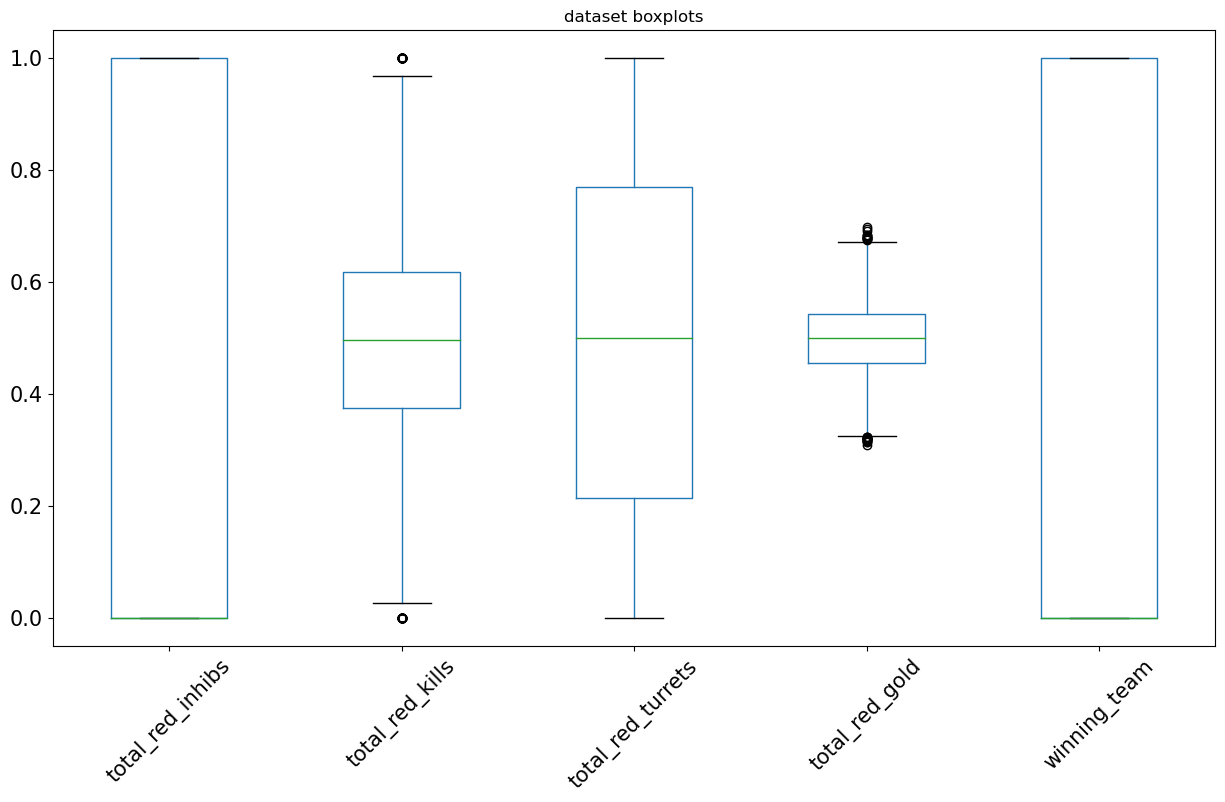

In [199]:
plt.figure(figsize = (15, 8))
plt.title("dataset boxplots")
data.boxplot(grid=False, rot=45, fontsize=15)
plt.show()

Los boxplots, por la naturaleza de los datos no aportan demasiado información. Todas las variables tienen un rango de valores de 0 a 1 tal y como se ha comentado anteriormente, a excepción del oro que tiene un rango menor ya que es imposible generar el 100% del oro, ya por el mero hecho de que recibes oro a medida que pasa el tiempo.

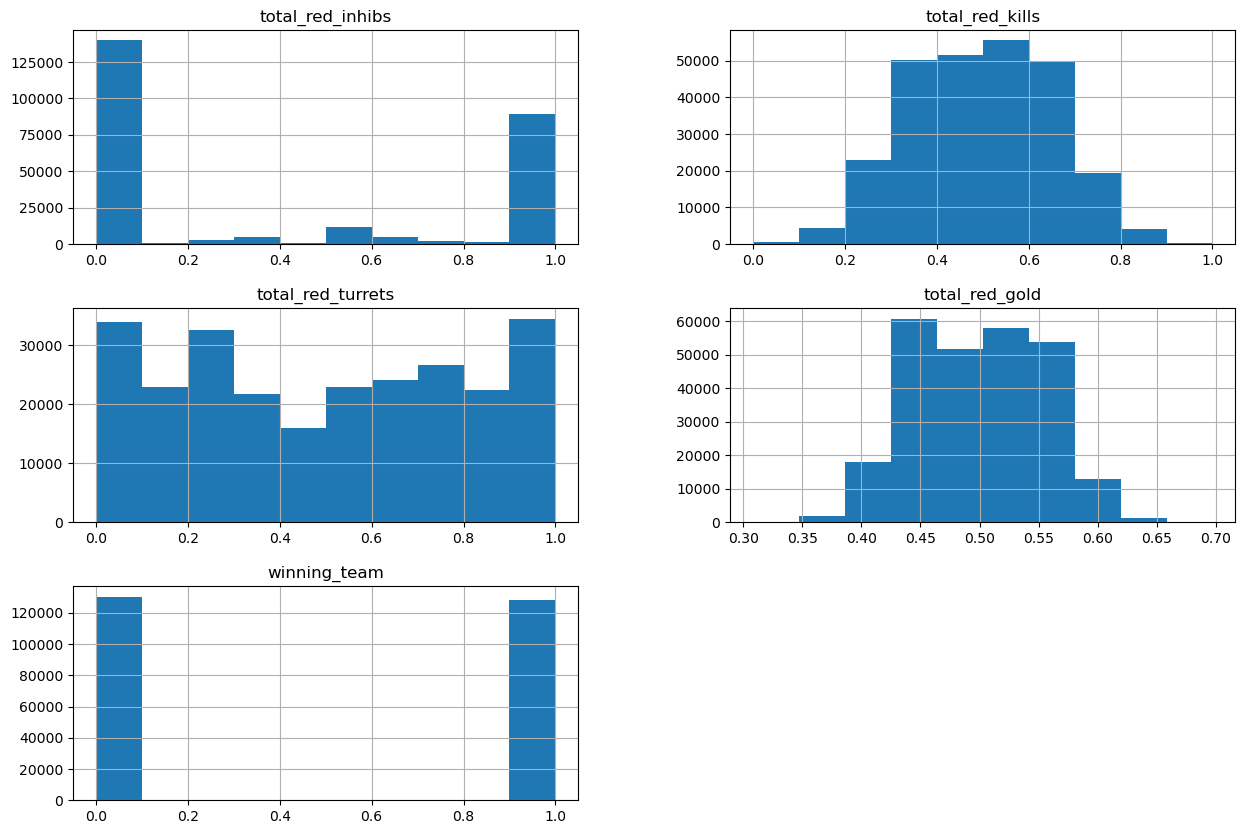

In [200]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

A través de estos histogramas veo un par de variables que si ya me gustaban antes, ahora me encantan. Hablo principalmente de las variables total_red_kils y total_red_gold, la cuales siguen una distribucion muy parecida a una normal.

Análisis de la columna: total_red_inhibs


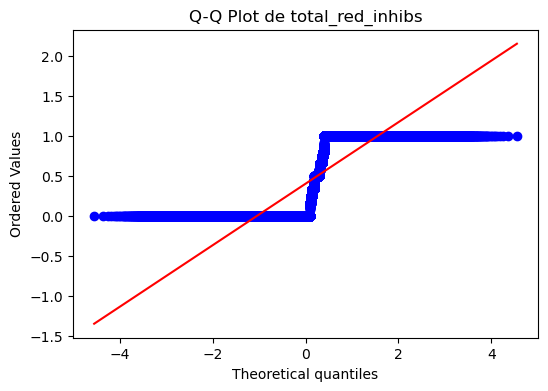

Shapiro-Wilk Test para total_red_inhibs: ShapiroResult(statistic=0.686787486076355, pvalue=0.0)

--------------------------------------------------

Análisis de la columna: total_red_kills


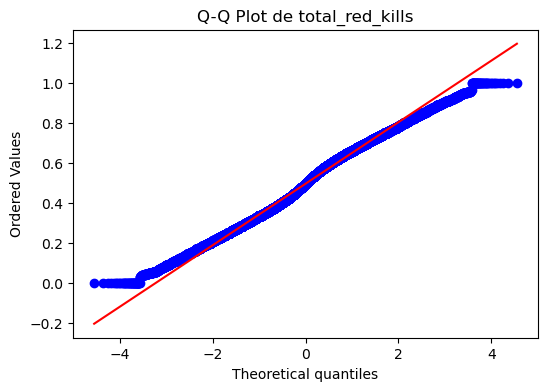

Shapiro-Wilk Test para total_red_kills: ShapiroResult(statistic=0.991360604763031, pvalue=0.0)

--------------------------------------------------

Análisis de la columna: total_red_turrets


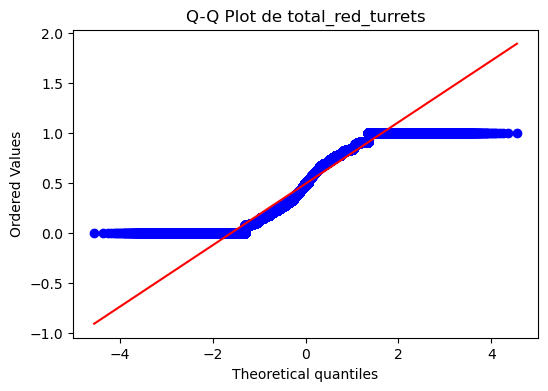

Shapiro-Wilk Test para total_red_turrets: ShapiroResult(statistic=0.9391899704933167, pvalue=0.0)

--------------------------------------------------

Análisis de la columna: total_red_gold


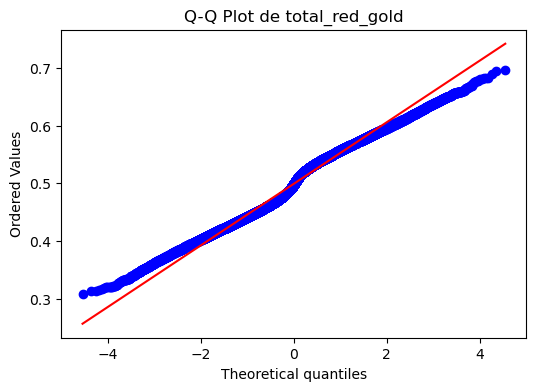

Shapiro-Wilk Test para total_red_gold: ShapiroResult(statistic=0.9799917936325073, pvalue=0.0)

--------------------------------------------------

Análisis de la columna: winning_team


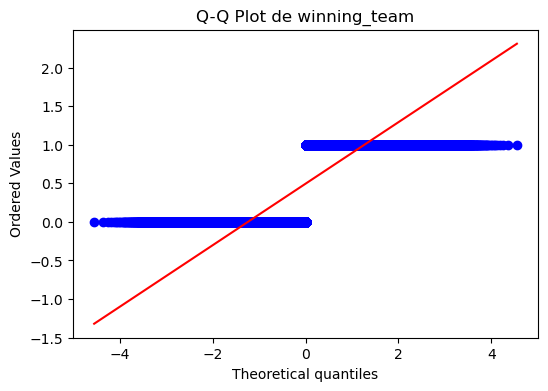

Shapiro-Wilk Test para winning_team: ShapiroResult(statistic=0.6372880339622498, pvalue=0.0)

--------------------------------------------------



In [204]:
for column in data.columns:
    print(f"Análisis de la columna: {column}")

    # Datos de la columna
    dat = data[column]

    # Diagrama Q-Q
    plt.figure(figsize=(6, 4))
    scipy.stats.probplot(dat, dist="norm", plot=plt) 
    plt.title(f'Q-Q Plot de {column}')
    plt.show()

    # Prueba de Shapiro-Wilk
    shapiro_test = scipy.stats.shapiro(dat)
    print(f'Shapiro-Wilk Test para {column}:', shapiro_test)


    print("\n" + "-" * 50 + "\n")

Aunque los resultados del test de shapiro, al igual que con el test ANOVA, no son aplicables, gracias a los gráficos qqplot podemos apreciar como realmente las variables mencionadas anteriormente siguen una distribución normal, o almenos algo muy parecido a ello.

<AxesSubplot:xlabel='total_red_turrets', ylabel='total_red_gold'>

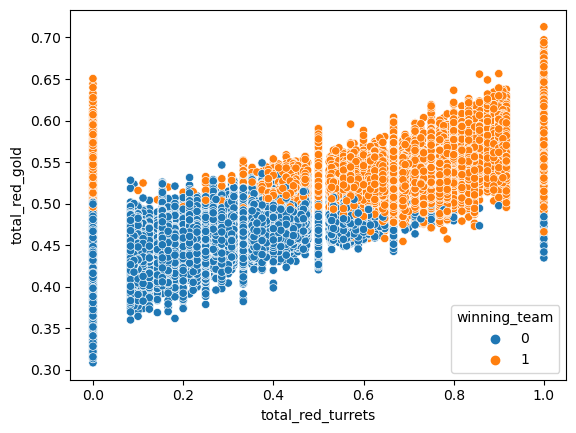

In [23]:
sns.scatterplot(data=data, x="total_red_turrets", y="total_red_gold", hue="winning_team")


En esta grafica vemos como hay una clara separación en los dos grupos a traves de la variable de oro generado. Esta separación es tan fuerte que incluso casi podriamos aventurarnos a dibujar una linea recta para separar los dos grupos.

<AxesSubplot:xlabel='total_red_kills', ylabel='total_red_gold'>

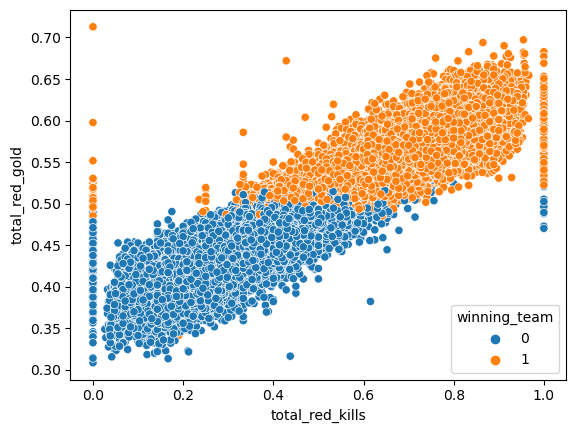

In [24]:
sns.scatterplot(data=data, x="total_red_kills", y="total_red_gold", hue="winning_team")


En esta nueva grafica de dispersión volvemos a ver lo mismo que antes, apreciando una fuerte diferencia en las victorias una vez el equipo ha conseguido más de la mitad del oro en la partida.

Estos resultados tienen mucho sentido, ya que como vemos una vez superado el 50% de oro generado en partida, la inmensa mayoria de las partidas terminan en victoria, pero hay algo que no me acaba de cuadrar aqui, y es que hay partidas en las que no se derriba ninguna torreta, o no se consigue ningun asesinato y aun así, el equipo consigue la victoria.

<AxesSubplot:xlabel='total_red_kills', ylabel='total_red_gold'>

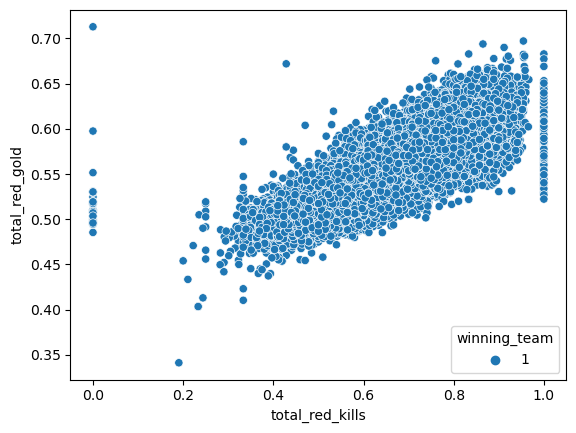

In [26]:
winning_data = data[data['winning_team'] == 1]

sns.scatterplot(data=winning_data, x="total_red_kills", y="total_red_gold", hue="winning_team")


En esta grafica podemos apreciar todas las victorias del equipo rojo y vemos como hay unas cuantas en la linea vertical de los 0 asesinatos, lo que mucho sentido no tiene ya que es dificil ganar una partida sin realizar ni un solo asesinato.

Mi teoria, es que estas partidas son probablemente early remakes que podriamos considerar como outliers ya que no aportan ningún tipo de informacion relevante. Para desharceme de ellos, recogeré todas las filas en las cuales ninguno de los equipos haya destruido ninguna torre y los descartaré.

In [8]:
remakes = dtf[dtf['total_blue_turrets'] == 0]
remakes = remakes[remakes['total_red_turrets'] == 0]

remakes

,total_blue_barons,total_blue_drakes,total_blue_heralds,total_blue_inhibs,total_blue_kills,total_blue_turrets,blue_first_blood,blue_first_herald,blue_first_drake,blue_first_baron,...,total_red_vs,total_red_gold,med_red_kills,med_red_xp,med_red_gold,med_red_dmg,red_got_soul,total_red_elders,med_red_vs,winning_team
240,0.0,1.0,0.0,0.0,0.612903,0.0,0.0,0.0,1.0,0.0,...,0.476923,0.493174,0.272727,0.470172,0.473239,0.471126,0.0,0.0,0.500000,0
303,0.0,0.0,0.0,0.0,0.900000,0.0,1.0,0.0,0.0,0.0,...,0.423077,0.409434,0.000000,0.430601,0.403222,0.407002,0.0,0.0,0.400000,0
359,0.0,1.0,1.0,0.0,0.714286,0.0,1.0,1.0,1.0,0.0,...,0.375000,0.466777,0.000000,0.495071,0.486624,0.369575,0.0,0.0,0.363636,0
528,0.0,0.0,0.0,0.0,0.230769,0.0,0.0,0.0,0.0,0.0,...,0.723404,0.590218,0.666667,0.551678,0.562118,0.524033,0.0,0.0,0.800000,1
705,0.0,0.0,0.0,0.0,0.320000,0.0,0.0,0.0,0.0,0.0,...,0.507576,0.552325,0.666667,0.516400,0.530164,0.529638,0.0,0.0,0.518519,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260145,0.0,0.0,0.0,0.0,0.666667,0.0,1.0,0.0,0.0,0.0,...,0.500000,0.468211,0.000000,0.485724,0.486451,0.481890,0.0,0.0,0.333333,0
260212,0.0,0.0,0.0,0.0,0.800000,0.0,1.0,0.0,0.0,0.0,...,0.250000,0.443060,0.000000,0.474276,0.434722,0.505067,0.0,0.0,0.000000,0
260232,0.0,0.0,0.0,0.0,0.833333,0.0,1.0,0.0,0.0,0.0,...,0.452830,0.416863,0.000000,0.440641,0.414487,0.431925,0.0,0.0,0.444444,0
260273,0.0,0.0,0.0,0.0,0.272727,0.0,0.0,0.0,0.0,0.0,...,0.636364,0.547018,1.000000,0.515419,0.583285,0.515865,0.0,0.0,0.583333,1


In [9]:
merged_df = dtf.merge(remakes, indicator=True, how='left')

# Filtering out the rows that are in the outlier dataframe
dtf2 = merged_df[merged_df['_merge'] == 'left_only']

# Dropping the indicator column to get back to the original df format
dtf2 = dtf2.drop(columns=['_merge'])

dtf2

,total_blue_barons,total_blue_drakes,total_blue_heralds,total_blue_inhibs,total_blue_kills,total_blue_turrets,blue_first_blood,blue_first_herald,blue_first_drake,blue_first_baron,...,total_red_vs,total_red_gold,med_red_kills,med_red_xp,med_red_gold,med_red_dmg,red_got_soul,total_red_elders,med_red_vs,winning_team
0,0.0,0.250000,1.0,0.000,0.296296,0.384615,0.0,1.0,0.0,0.0,...,0.558219,0.545251,0.666667,0.563770,0.576382,0.590990,0.0,0.0,0.591837,1
1,0.0,0.333333,0.5,0.000,0.382979,0.200000,0.0,0.0,0.0,0.0,...,0.477941,0.550159,0.615385,0.545908,0.541195,0.564682,0.0,0.0,0.444444,1
2,1.0,0.800000,1.0,1.000,0.580000,0.777778,1.0,1.0,1.0,1.0,...,0.461916,0.457899,0.555556,0.447661,0.462313,0.532810,0.0,0.0,0.479167,0
3,0.0,0.000000,0.0,0.000,0.325000,0.200000,1.0,0.0,0.0,0.0,...,0.562814,0.556320,0.600000,0.561002,0.578235,0.578971,0.0,0.0,0.480000,1
4,0.0,0.000000,0.0,0.000,0.305556,0.250000,1.0,0.0,0.0,0.0,...,0.562814,0.550850,0.875000,0.558064,0.533141,0.575823,0.0,0.0,0.563380,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261363,0.0,0.200000,1.0,0.000,0.388889,0.428571,1.0,1.0,0.0,0.0,...,0.526455,0.528852,0.523810,0.546861,0.513121,0.504231,1.0,0.0,0.634146,1
261364,0.0,0.400000,0.5,0.750,0.519481,0.500000,0.0,1.0,0.0,0.0,...,0.515504,0.520899,0.535714,0.536334,0.516917,0.468576,0.0,0.0,0.464286,1
261365,1.0,0.750000,1.0,1.000,0.741935,0.692308,1.0,1.0,0.0,1.0,...,0.432653,0.455437,0.285714,0.426852,0.437834,0.362875,0.0,0.0,0.405405,0
261366,0.0,0.666667,0.0,0.125,0.520408,0.388889,0.0,0.0,0.0,0.0,...,0.520325,0.492918,0.516129,0.457341,0.480867,0.434588,0.0,0.0,0.482759,0


In [10]:
data = dtf2[['total_red_inhibs','total_red_kills', 'total_red_turrets', 'total_red_gold', 'winning_team']]
data

,total_red_inhibs,total_red_kills,total_red_turrets,total_red_gold,winning_team
0,1.000,0.703704,0.615385,0.545251,1
1,1.000,0.617021,0.800000,0.550159,1
2,0.000,0.420000,0.222222,0.457899,0
3,1.000,0.675000,0.800000,0.556320,1
4,0.000,0.694444,0.750000,0.550850,1
...,...,...,...,...,...
261363,1.000,0.611111,0.571429,0.528852,1
261364,0.250,0.480519,0.500000,0.520899,1
261365,0.000,0.258065,0.307692,0.455437,0
261366,0.875,0.479592,0.611111,0.492918,0


En las celdas anteriores se puede apreciar el proceso de limpieza de los outliers y el dataset final con 2000 filas menos.

<AxesSubplot:xlabel='total_red_kills', ylabel='total_red_gold'>

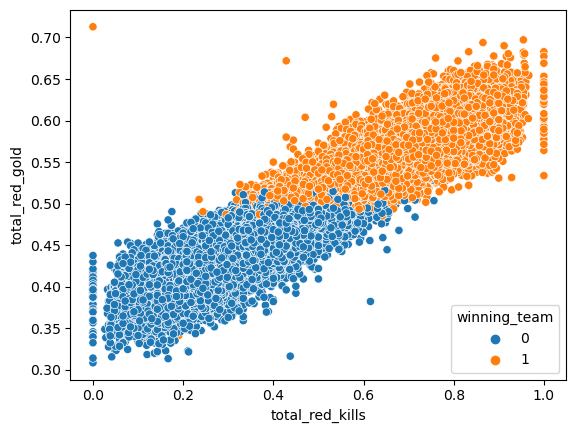

In [30]:
sns.scatterplot(data=data, x="total_red_kills", y="total_red_gold", hue="winning_team")


Una vez nos hemos librado de esos datos, en este nuevo scatterplot vemos como la separación entre ambas categorias en todavia más notoria. Aunque hay un punto que me molesta un poco del que no me he podido librar con el anterior filtrado, el cual indica que se genero la gran mayoria del oro de la partida, sin ningún asesinato, y ganarón la partida. Es muy probable que este punto tambien sea un outlier, aunque si que se derribo alguna torre, solo introduciria ruído en nuestra calsificación, por lo cual también me desharé de él.

In [11]:
outlier = data[data['total_red_kills'] == 0]
outlier = outlier[outlier['winning_team'] == 1]
outlier

,total_red_inhibs,total_red_kills,total_red_turrets,total_red_gold,winning_team
183832,1.0,0.0,1.0,0.712882,1


In [12]:
outlier_condition = (data['winning_team'] == 1) & (data['total_red_kills'] == 0)

# Filter the DataFrame to exclude the outlier
data = data[~outlier_condition]

<AxesSubplot:xlabel='total_red_kills', ylabel='total_red_gold'>

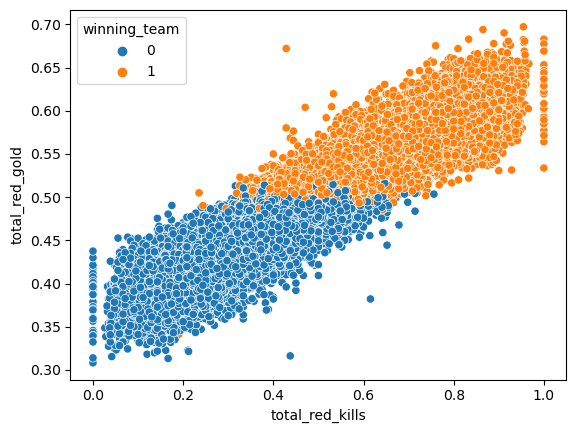

In [206]:
sns.scatterplot(data=data, x="total_red_kills", y="total_red_gold", hue="winning_team")


Qué bonito.

Por último, antes de empezar con la parte de clustering, haré una grafica donde mostraré las distribuciones de las variables separandolas por victoria y derrota además de unos scatterplots de todas las variables.

<Figure size 500x2000 with 0 Axes>

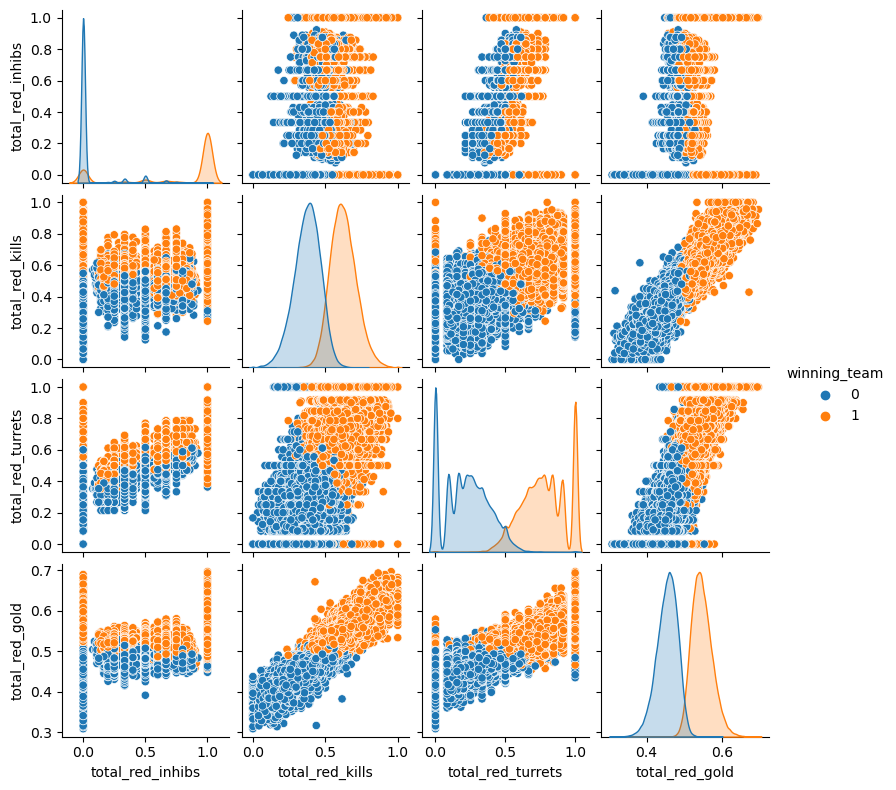

In [69]:
plt.figure(figsize = (5, 20))
sns.pairplot(data,  hue='winning_team', height=2, palette = "tab10")
plt.show()

Como vemos tanto las victorias como las derrotas siguen las mismas distribuciones con distintas medias, a excepción de las torres, que siguen una distribución inversa. Lo más interesante de estas gráficas es que en todas ellas podemos identificar y separar fácilmente las 2 categorias, victoria y derrota.

#### Conclusiones variables

Tras este análisi exploratorio de los datos esta bastante claro que mi variable objetivo debe ser la variable de victoria, puesto que como hemos visto muestra una clara separación entre las muestras y es muy possible que nuestros algoritmos sean capaces de identificar estos grupos.

Además de eso, hemos encontrado que las mejores variables para identificarla son los porcentages de inhibidores, torres, asesinatos y oro. Pero debido a la distribución poco útil que sigue la variable de inhibidores las variables que usaré serán las otras tres, priorizando el uso de la variable de oro generado que hemos visto que es la que marca la mayor diferencia entre los grupos, seguida de el porcentage de asesinatos la cual también sigue una distribución normal y tal y como vemos en la última gráfica, también permite identificar dos grupos con similar distribución pero distinta media.

En cuánto a la calidad de los datos, hemos visto como estaban realmente bien tratados desde un principio, y para limpiarlos únicamente he tenido que deshacerme de unos pocos valores nulos e identificar ciertas medidas que no tenian demasiado sentido. Pero por el resto, los datos venian ya normalizados y categorizados en valores númericos por lo que no ha hecho falta ningún tipo de tratamiento de datos en esos campos.

### Clustering

####  Método Jerárquico

Para poder usar este método lo primero que he tenido que hacer ha sido realizar una reducción de los datos, puesto que las mas de 250000 filas que tiene el dataframe eran demasiadas para efectuar este algoritmo.

In [307]:
data_reduced = data.sample(frac=0.01, random_state=42)
data_reduced2 = data_reduced.iloc[:, [1, 2, 3]]
data_reduced2

,total_red_kills,total_red_turrets,total_red_gold
22479,0.416667,0.333333,0.466626
209870,0.643836,0.909091,0.535531
31834,0.612903,0.700000,0.546591
196357,0.722222,1.000000,0.563411
258863,0.677419,0.800000,0.559702
...,...,...,...
15529,0.568966,0.600000,0.526855
52695,0.581395,0.687500,0.534563
66399,0.264706,0.300000,0.440343
174064,0.300000,0.214286,0.448385


Para este algoritmo, como he comentado en las conclusiones anteriores, uso los asesinatos, torres y oro para identificar los grupos y una vez reducido el dataframe me dispongo a efectuar el algoritmo. 

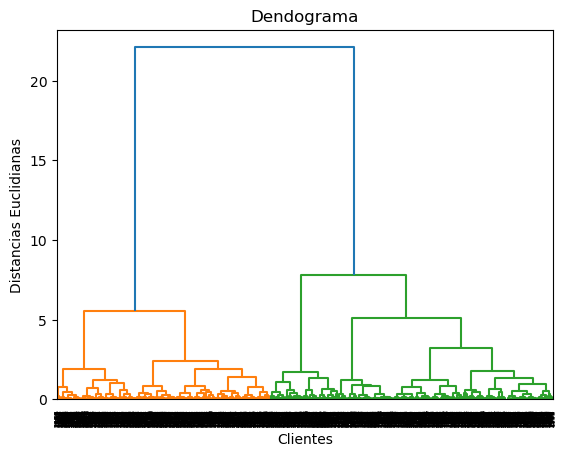

In [40]:
X = data_reduced2.values

dendrograma = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

Tal y como esperaba, con estos 3 parámetros vemos como el algoritmo es capaz de identificar dos grandes grupos principales, que más tarde se dividen en más grupos, pero como se puede ver, hay una distancia muy grande hasta que eso ocurre, y eso que para entrenar el modelo ni si quiera he usado la variable objetivo winning_team. Ahora me dispondré a crear un modelo de agglomerative clustering con 2 clusters para ver como se dividen los datos.

In [41]:
hc = AgglomerativeClustering(n_clusters = 2, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

In [47]:
clustering = AgglomerativeClustering(n_clusters = 2).fit(X)

<AxesSubplot:xlabel='total_red_kills', ylabel='total_red_gold'>

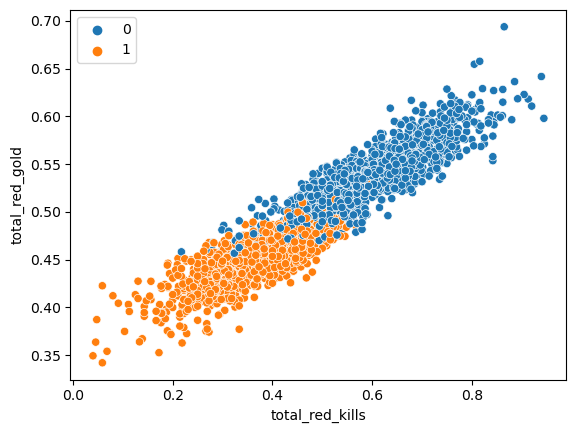

In [49]:
sns.scatterplot(data=data_reduced2, x="total_red_kills", y="total_red_gold", hue=clustering.labels_)

Lo primero que salta a la vista es la menor cantidad de puntos que tiene este scatterplot, pero ademas de esto, tambien se puede ver como la particion de datos se parece mucho a las que hemos visto previamente, para asegurarnos de ello primero haré la misma gráfica dividiendo los datos por los datos verdaderos en vez de previstos.

<AxesSubplot:xlabel='total_red_kills', ylabel='total_red_gold'>

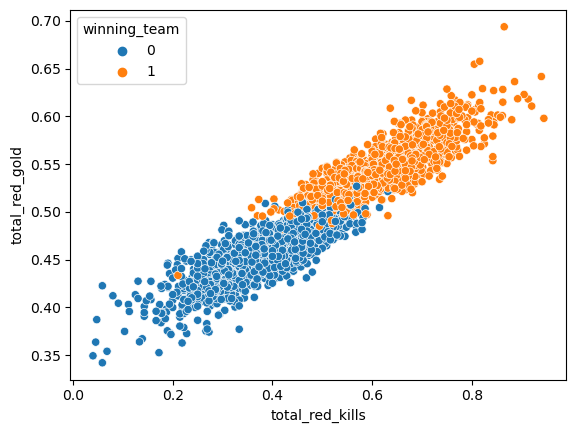

In [50]:
sns.scatterplot(data=data_reduced, x="total_red_kills", y="total_red_gold", hue="winning_team")

Efectivamente ambos gráficos se parecen bastante, pero eso no es suficiente para evaluar los resultados, a continuación calcularé la f1 score de los resultados y generaré una matriz de confusión para un mejor entendimiento de los resultados.

In [125]:
r_cluster = []
for predClass in clustering.labels_:
  if predClass == 1:
    r_cluster.append(0)
  else:
    r_cluster.append(1)


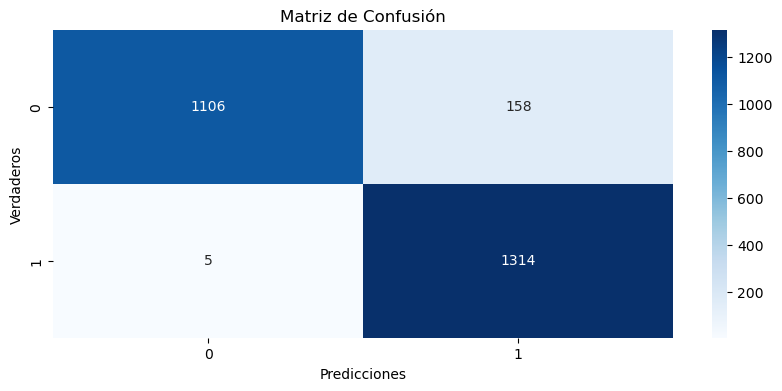

In [110]:
cm = confusion_matrix(data_reduced['winning_team'], r_cluster)

plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

Parece que los resultados son bastante exactos, para mejorar todavía más el modelo se podria echar un vistazo a aquellas predicciones que son falsos positivos y entender el porque de estas equivocaciones.

In [111]:
f1_score(data_reduced['winning_team'], r_cluster, average = 'macro')

0.9364832073016651

Una f1 score bastante alta que nos confirma lo que hemos estado viendo con el análisis de los resultados.

##### Conclusiones Método Jerárquico

Este método ha demostrado ajustarse realmente bien a los datos, identificando correctamente las categorias en la inmensa mayoria de las ocasiones y lo hemos visto reflejado en cada método usado para evaular su eficiencia, desde las gráficas hasta la f1 score. 

En cuanto al coste, este algoritmo tiene un coste bastante alto de n^3. Esta es la razón por la que he tenido que reducir drásticamente el tamaño de las muestras al principio, ya que con todas no me permitia ni compilar, y con una décima parte tardaba una infinidad. Por esta razón, aunque el método haya funcionado muy bien con los datos introducidos, puede que sea mejor explorar alguna alternativa en la que podamos usar más datos, puesto que usando solo un 1% de los datos es muy posible que me este perdiendo información relevante.

Como alternativas existen implementaciones más eficientes, como el algoritmo de Lance-Williams, que pueden reducir la complejidad incluso a n^2, o otros métodos distintos como K-Means el cual probaré a continuación.

#### K-Means

El coste de este algoritmo es algo menor que el del clustering jerárquico por lo que podre usar más muestras que antes. Para que el tiempo de computación no se vaya demasiado largo, usaré el 5% de las muestras.

In [224]:
#X_data = data_reduced2
data_reduced3 = data.sample(frac=0.05, random_state=42)
X_data = data_reduced3.iloc[:, [1, 2, 3]]
#y_class = data_reduced['winning_team']
y_class = data_reduced3['winning_team']

X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_class, test_size=0.25, random_state=4)

print("Tamaño dataset entrenamiento:",X_train.shape)
print("Tamaño dataset validación:",X_test.shape)

Tamaño dataset entrenamiento: (9685, 3)
Tamaño dataset validación: (3229, 3)


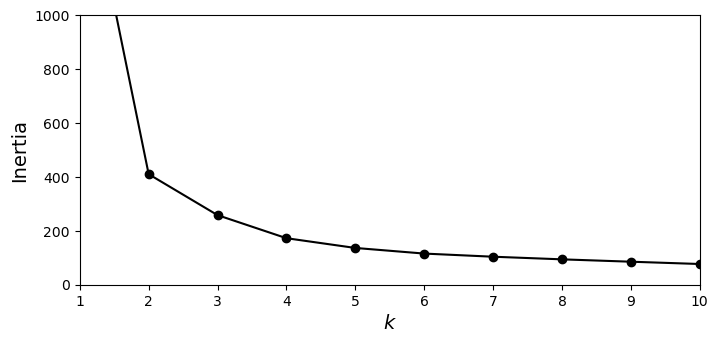

In [225]:
kmeans_model_list = [KMeans(n_clusters=k, random_state=4).fit(X_data) for k in range(1, 20)]

inertias = [model.inertia_ for model in kmeans_model_list]

plt.figure(figsize=(8, 3.5))

plt.plot(range(1, 20), inertias, "ko-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 10, 0, 1000])
plt.show()

El método del codo se usa para determinar cuantos clústers deberiamos usar para maximizar la eficacia sin hacer demasiado overfitting en el modelo. En este caso el número de clústers óptimo estaria alrededor de k = 3 o 4, sin embargo, como estamos tratando una variable categórica, usaré una k de 2, ya que es el número de categorias de la variable winning_team y presenta un valor de inertia decente.

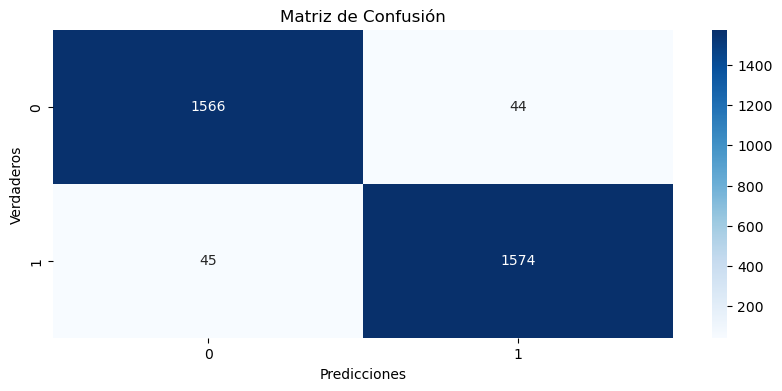

In [226]:
model_f = KMeans(n_clusters=2, random_state = 0).fit(X_train)

preds = model_f.fit_predict(X_test)

cm = confusion_matrix(Y_test, preds)

plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

A juzgar por esta matriz de confusión el modelo se adapta excepcionalmente bien a nuestros datos dando incluso menos errores que el método jerarquico, con muchos más datos. Para acabar de entender estos resultados, realizaré un par de gráficas y calcularé la silhouette score y la f1 score del modelo.

<AxesSubplot:xlabel='total_red_kills', ylabel='total_red_gold'>

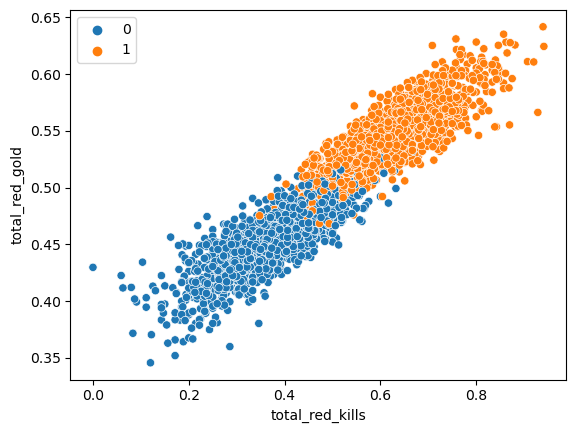

In [227]:
sns.scatterplot(data=X_test, x="total_red_kills", y="total_red_gold", hue=preds)

<AxesSubplot:xlabel='total_red_kills', ylabel='total_red_gold'>

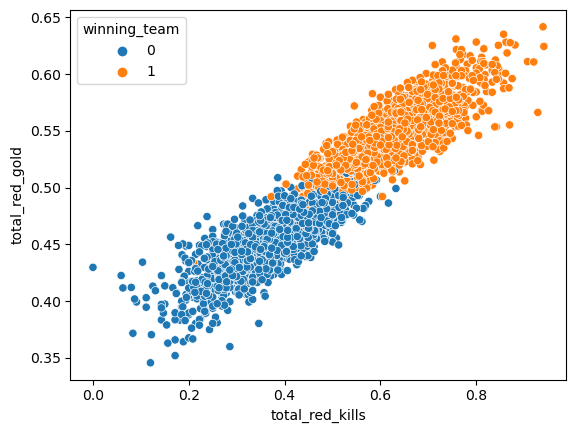

In [228]:
sns.scatterplot(data=X_test, x="total_red_kills", y="total_red_gold", hue=Y_test)

Al igual que con el método anterior, los gráficos de datos predecidos y los verdaderos se parecen mucho lo cual es otro indicador de que el algoritmo se adapta bien a los datos.

In [230]:
print(f'Silhouette Score: {silhouette_score(X_test, preds)}')

Silhouette Score: 0.6294801125486582


El Silhouette score es una forma de determinar el grado de separación entre los clusters, variando entre 1 y -1 siendo un valor alto un indicador de que los objetos están bien emparejados a su propio cluster y mal emparejados a los clusters vecinos. Sin embargo al contar con solo 2 clusters que cuyos puntos, estan bastante cerca los unos de los otros, este indicador puede no ser perfectamente refejante del nivel de adaptación del modelo a los datos. Aún así tenemos un Silhouette score superior a 0.6 lo cual indica un grado de separación importante.

In [231]:
r_cluster2 = []
for predClass in preds:
  if predClass == 1:
    r_cluster2.append(1)
  else:
    r_cluster2.append(0)

f1_score(Y_test, r_cluster2, average = 'macro')

0.9724371178981923

La f1 score es incluso más alta que la del método jerarquico lo cual confirma la impresionante adaptación de este algoritmo a las muestras.

##### Conclusiones K-Means

Si el método anterior se adaptaba bien a los datos, este es incluso mejor. Con una f1 score casi perfecta y unos valores en la matriz de confusión con muy poco error es muy posible que sea el mejor método de los estudiados para lidiar con estos datos. Por ello no se me ocurre nigun otro algorimto que usar como alternativa que pueda ofrecer mejores resultados.

En lo referente al coste, es mucho es menor al del método jerárquico, y aunque también he tenido que usar una muestra reducida para que el tiempo de computación no fuera demasiado alto, es un algoritmo con el que podríamos tratar de trabajar las muestras en su totalidad. El coste del algoritmo es: (Número de Puntos) * (Número de Clusters) * (Número de Dimensiones) * (Número de Iteraciones). Por lo cual al solo tener 2 clústers y 3 dimensiones, el tiempo de computacion total no sería exageradamente alto.

#### DBSCAN

Para este algoritmo, al igual que con K-means, usaré el 5% de los datos.

In [297]:
db = DBSCAN(eps=0.08, min_samples=12).fit(X_data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 7


<AxesSubplot:xlabel='total_red_kills', ylabel='total_red_gold'>

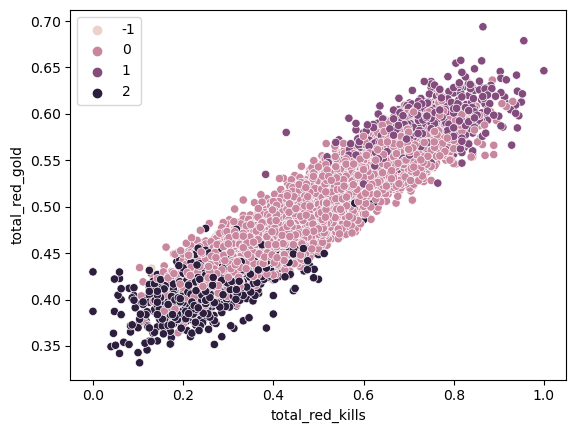

In [292]:
sns.scatterplot(data=data_reduced3, x="total_red_kills", y="total_red_gold", hue=labels)

He usado los valores de epsilon y minimum samples que a ojo parecian crear el número de clusters y outliers que mejor se adaptara a los datos, el resultado deja bastante que desear, sin embargo es algo natural debido a la naturaleza de los datos, al no existir una clara diferencia de densidad entre los clusters, este tipo de algoritmos no se adapta del todo bien. Pero intentaré maquillar un poco el resutltado tratando de encontrar los valores más óptimos para los parámetros.

In [294]:
eps_values = np.arange(0.01, 0.2, 0.02)
min_samples_values = range(2, 10)
best_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_data)
        labels = db.labels_

        # Ignoring noise if present
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            score = silhouette_score(X_data, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best parameters: {best_params}, Silhouette Score: {best_score}")

Best parameters: {'eps': 0.06999999999999999, 'min_samples': 4}, Silhouette Score: 0.06877260009525492


In [295]:
db = DBSCAN(eps=0.07, min_samples=4).fit(data_reduced3)
labels2 = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_noise_ = list(labels2).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 12
Estimated number of noise points: 59


<AxesSubplot:xlabel='total_red_kills', ylabel='total_red_gold'>

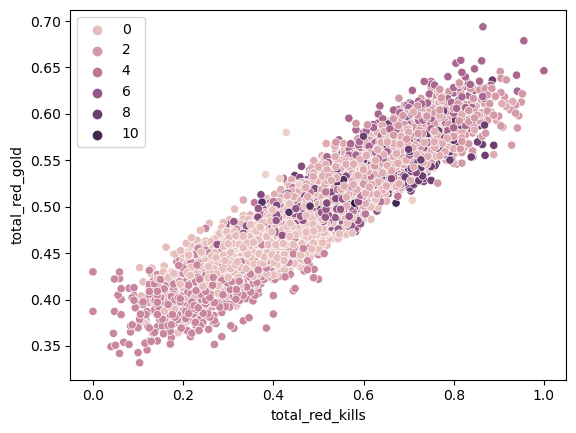

In [296]:
sns.scatterplot(data=data_reduced3, x="total_red_kills", y="total_red_gold", hue=labels2)

Como se puede apreciar, son demasiados clusters y el resultado no es para nada mejor que el anterior, así que me quedaré con el anterior ya que almenos tenía un número de clústers más parecido a lo que necesitamos.

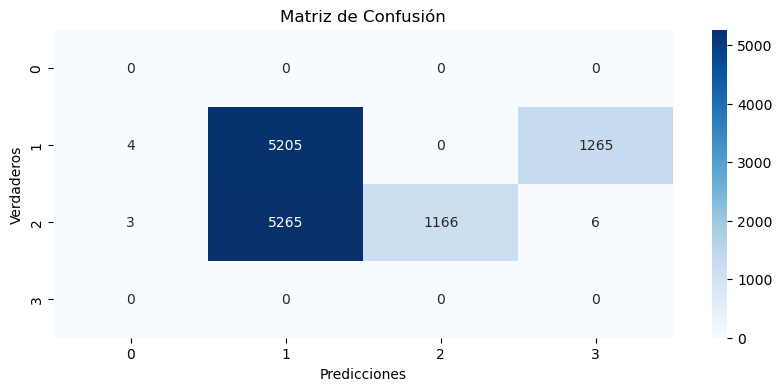

In [298]:
cm = confusion_matrix(data_reduced3['winning_team'], labels)

plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

Como se veia con la gráfica del primer modelo, hay un clúster mucho mas denso que el resto el cual agrupa la mayoria de las muestras.

##### Conclusiones DBSCAN

Este algoritmo a diferencia de los dos anteriores, no se ha adaptado bien a los datos. Esto tiene bastante sentido puesto que es un algoritmo completamente distinto a los probados anteriores ya que se basa en funciones de densidad para asignar los puntos a los distintos clusers. Teniendo en cuenta la distribucion de las muestras, es normal que un algoritmo density-based no se adapte bien, ya que estas no muestran una diferencia entre las densidades de las categorias, por lo que el algoritmo no es capaz de identificarlas correctamente.

El coste del algoritmo es de n^2, el cual es menor al método jerarquico per sigue siendo costoso y por ello hemos usado el 5% de los datos. Probé con el 1% también por si se apreciaba una diferencia al tener menos densidad de puntos, pero el algoritmo seguía sin adaptarse a los datos.

En cuánto a las alternativas para este algoritmo, podríamos considerar otros algoritmos como HDBSCAN o OPTICS el con el cual trabajaré ahora, sin embargo dudo mucho que un algoritmo de densidad pueda adaptarse correctamente a estos datos.

#### OPTICS

Ya que este algoritmo tiene 3 parametros y añade una dimensión a la búsqueda de los parámetros óptimos, usaré el 1% de las muestras. Pero primero haré una prueba con valores no óptimos.

In [317]:
optics_model = OPTICS(min_samples=4, xi=0.05, min_cluster_size=0.05)

# Fit the model
optics_model.fit(data_reduced2)

OPTICS(min_cluster_size=0.05, min_samples=4)

In [318]:
labels = optics_model.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(f'Estimated number of clusters: {n_clusters_}')


Estimated number of clusters: 4


<AxesSubplot:xlabel='total_red_kills', ylabel='total_red_gold'>

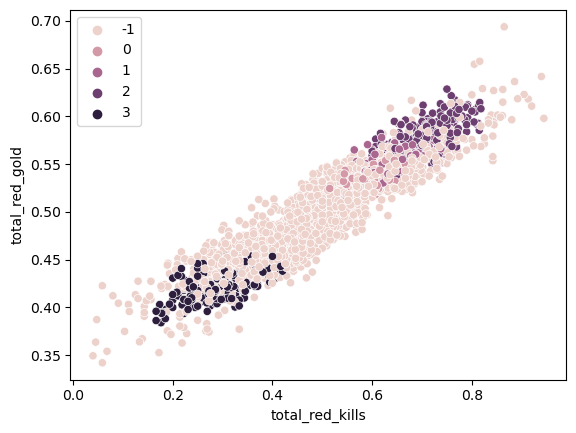

In [319]:
sns.scatterplot(data=data_reduced2, x="total_red_kills", y="total_red_gold", hue=labels)

Como vemos el output es muy similar al conseguido con DBSCAN, debido a que ambos son algoritmos basados en funciones de densidad, y como he comentado anteriormente, este tipo de algoritmos no se ajusta bien a la naturaleza de los datos. Aún así voy a buscar los parámetros más óptimos para ver si el resultado mejora.

In [303]:
min_cluster_size_values = np.arange(0.03, 0.15, 0.02)
xi_values = np.arange(0.03, 0.15, 0.02)
min_samples_values = range(2, 6)
best_score = -1
best_params = {}

for min_cluster_size in min_cluster_size_values:
    for min_samples in min_samples_values:
        for xi in xi_values:
            optics_model = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=0.05)
            optics_model.fit(data_reduced2)

            labels = optics_model.labels_

            # Ignoring noise if present
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            if n_clusters > 1:
                score = silhouette_score(data_reduced2, labels)
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples, 'xi': xi}
        

print(f"Best parameters: {best_params}, Best Score: {best_score}")

Best parameters: {'eps': 0.18999999999999997, 'min_samples': 3, 'xi': 0.13}, Best Score: 0.05018853467652508


In [327]:
optics_model = OPTICS(min_samples=3, xi=0.13, min_cluster_size=0.19)

# Fit the model
optics_model.fit(data_reduced2)

OPTICS(min_cluster_size=0.19, min_samples=3, xi=0.13)

In [328]:
labels2 = optics_model.labels_

print(f'Estimated number of clusters: {len(set(labels2)) -1}')

Estimated number of clusters: 1


<AxesSubplot:xlabel='total_red_kills', ylabel='total_red_gold'>

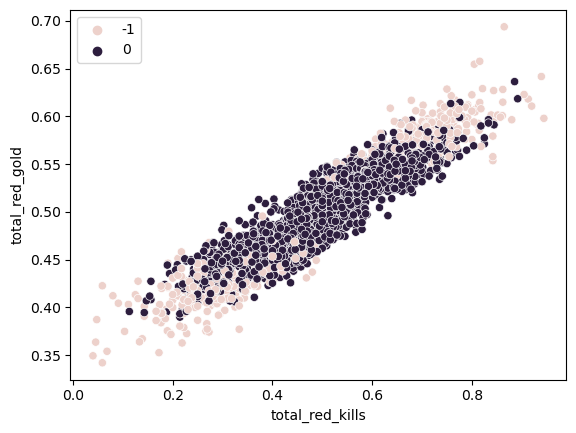

In [329]:
sns.scatterplot(data=data_reduced2, x="total_red_kills", y="total_red_gold", hue=labels2)

Una vez más los supuestos parámetros más óptimos resultan en un modelo que se adapta incluso menos a los datos, por ello descartaré totalmente esta opción y volveré a la anterior.

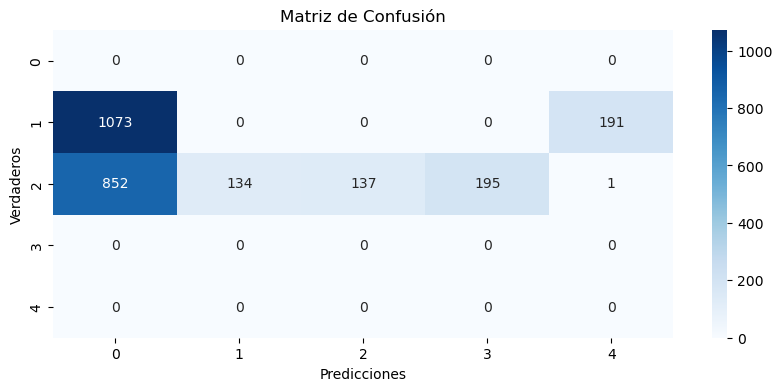

In [330]:
cm = confusion_matrix(data_reduced['winning_team'], labels)

plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

Parecido al DBSCAN, vemos como hay un clúster mucho más denso que el resto que agrupa la mayoria de los datos.

##### Conclusiones OPTICS

Este algoritmo ha ofrecido unos resultados muy parecidos a los obtenidos con DBSCAN. Al igual que este, OPTICS no ha podido adaptarse correctamente a los datos, resultando en una clasificación mayormente erronea. Similarmente a DBSCAN esto se debe a que estamos trabajando con un algoritmo basado en densidad y en este caso, los datos no presentan diferencias que este tipo de algoritmos pueda identificar facilmente.

En cuánto al coste de computación, para este algoritmo es de n^2, esto se debe a que, en el peor de los casos, el algoritmo necesita comparar cada punto con todos los demás para determinar la compatibilidad.

En cuanto a las alternativas, si no nos vamos a algoritmos como K-Means que ha demostrado ser muy útil para estos datos, podríamos mirar de probar como responde algún algoritmo de clasificacion basado en redes neuronales como el SOM. Sin embargo esto seguramente sería complicarse de más. Lo que queda bastante claro es que para estos datos es mejor que nos alejemos de algoritmos de densidad.

### Conclusiones

Tras la realización de este proyecto hemos visto primero, un análisis de datos del videojuego league of legends. Datos que eran bastante buenos, con poca limpieza por hacer en la que simplemente he tenido que limpiar algunos valores nulos y deshacerme de ciertos outliers gracias a mi vasto conocimiento del dominio (i'm mentally insane). Gracias a este análisis he escogido 4 variables que potencialmente podían ser altamente descriptivas de mi quinta variable, la variable objetivo, la victoria. Aunque al final solo he usado 3 de ellas debido a la normalidad que presentaban.

En cuánto a los algoritmos, voy a hacer un breve resumen de lo que hemos aprendido de cada uno de ellos:

###### &#9679; Clustering Jerárquico: 
    Con un coste de n^3, este es el algoritmo con mayor coste de entre todos los probados, por ello solo he podido usar el 1% de los datos, por lo que es probable que haya perdido información importante para el modelo. Sin embargo, hemos visto que es un algoritmo que se adaptaba de manera excelente a los datos, asignando la categoria correcta en más del 93% de  los puntos.

###### &#9679; K-Means: 
    Este ha sido el algoritmo que ha presentado un mejor resultado al mismo tiempo de ser el algoritmo de menor coste, con un coste de (Número de Puntos) * (Número de Clusters) * (Número de Dimensiones) * (Número de Iteraciones). Hemos visto como este algoritmo suplia las carencias del clústering jerárquico adaptandose incluso mejor que este a los datos con más de un 97% de acierto en la clasificación de los datos.


###### &#9679; DBSCAN: 
    Con un coste máximo de n^2 este algoritmo se presentaba como un buen aspirante al trono, sin embargo tras la creación y posterior graficación del primer modelo, ha quedado claro que estaba muy lejos de los dos anteriores algoritmos. Con un clúster principal al que se le asignaban la mayoria de puntos este algoritmo ha fallado gravemente en clasificar nuestros datos. 

###### &#9679; OPTICS: 
    Siendo muy parecido a DBSCAN con el mismo coste máximo, OPTICS nos ha ofrecido un resultado muy parecido al obtenido con el algoritmo previo por lo cual que también ha fracasado en clasificar correctamente los datos.

Tras usar y analizar cada uno de los algortimos hemos podido concluir que debido a la naturaleza de los datos, los algoritmos de clasificación basados en algoritmos de densidad no se adaptan bien a estos, y que es mucho mejor usar algoritmos de clústering jerárquico o basado en particiones como K-Means, que se adaptan mucho mejor a los datos en cuestión.

### Que más habría hecho

En cuánto a que más se podría haber hecho para mejorar los resultados, lo primero seria tratar de usar los algoritmos con la plenitud de los datos, de tal manera que nos asegurariamos de no perder ningún tipo de información que pueda afectar a la clasificacion. Por ejemplo, podria haber usado un algoritmo de PCA para reducir la complejidad del dataframe y de esta manera reducir la cantidad de capacidad de computación necesaria para la realización de los algoritmos.

Además de esto, podria haber probado algún algoritmo de clasificacion más avanzado como algún algoritmo basado en redes neuronales como Self Organizing Maps (SOM) para ver si estos ofrecian una mejor clasificacion que la obtenida hasta ahora, aunque es realmente dificil teniendo en cuenta donde ha puesto el nivel K-Means.

Por último, otra cosa mas que se podría haber hecho hubiese sido usar los ficheros Json que nos daban en el mismo link y extraer otro tipo de datos y buscar relaciones en esos datos. De hecho, en primera instancia mi idea era ver como afectaba en las probabilidades de victoria del equipo el hecho de que hubiera un tanque entre sus integrantes, sin embargo al fijarme en los datos, no pude encontrar ninguna variable que indicara que un campeón fuera tanque o no y por ello decidi centrarme en los datos del fichero csv.